<a href="https://colab.research.google.com/github/meetdarbar93/AI-ML-Internship/blob/main/Day9/Day9_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/mall_customers.csv"
df = pd.read_csv(url)
X = df.select_dtypes(include=['float64', 'int64'])



#Apply K-Means Clustering


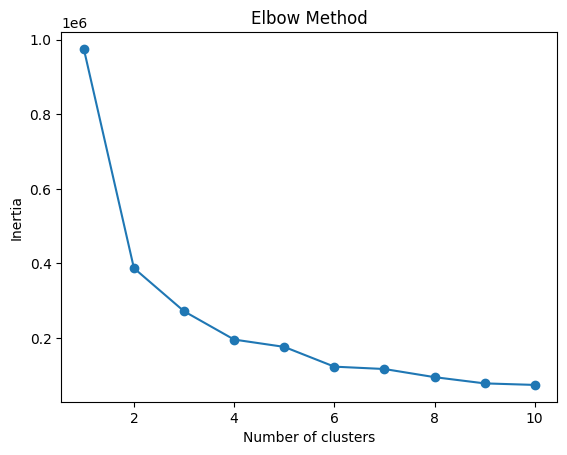

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Train K-Means using optimal K:


Text(0.5, 1.0, 'K-Means Clustering')

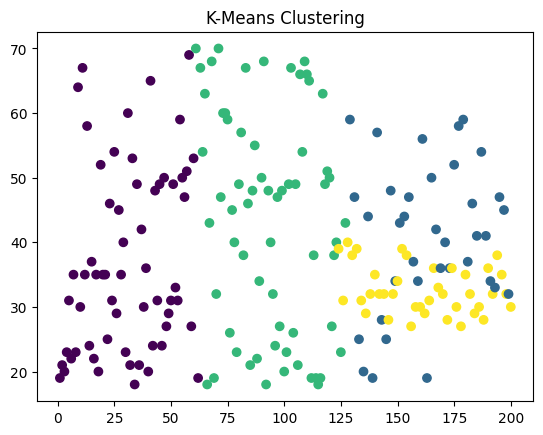

In [3]:
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)
df['Cluster'] = labels

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels)
plt.title("K-Means Clustering")

#Compute Silhouette Score


In [4]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.421025551215622


#Apply Hierarchical Clustering


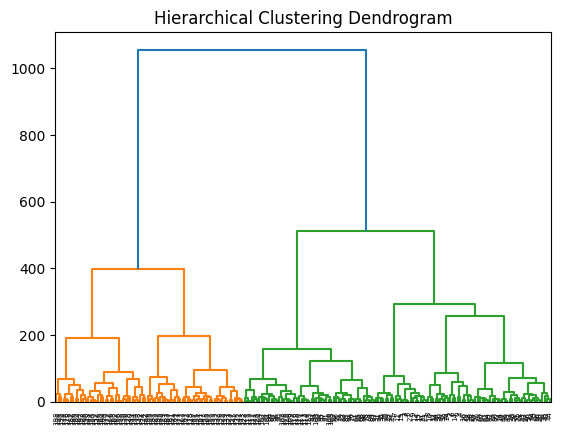

In [5]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4)
hc_labels = hc.fit_predict(X)
df['HC_Cluster'] = hc_labels

from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

#Apply PCA for Visualization


Text(0.5, 1.0, 'Clusters Visualized After PCA')

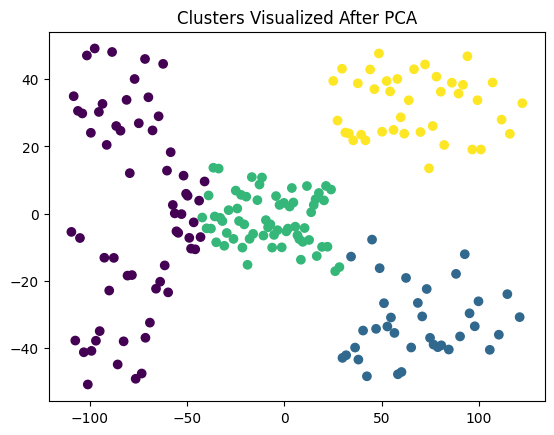

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Clusters Visualized After PCA")

#Comparasion table

In [7]:
data = {
    "Method": ["K-Means", "Hierarchical Clustering"],
    "Number of Clusters": [4, 4],
    "Silhouette Score": [score, silhouette_score(X, hc_labels)],
    "Visual seperation":["Good","Moderate"]
}
df_compare = pd.DataFrame(data)
df_compare.to_csv('comparasion.csv', index=False)
df_compare

,Method,Number of Clusters,Silhouette Score,Visual seperation
0,K-Means,4,0.421026,Good
1,Hierarchical Clustering,4,0.390791,Moderate
